In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("/home/paulo/Downloads/project_salary_years/salary_data.csv", sep=';')

In [5]:
df.head()

,ID,income,age,gender,education_level
0,12182,86519.608537,45,M,2.0
1,81213,83085.864980,30,M,2.0
2,1996,82606.214973,22,M,2.0
3,9366,81551.229988,36,M,2.0
4,9733,79593.253224,51,M,1.0


In [6]:
df.describe()

,ID,income,age,education_level
count,100000.000000,100000.000000,100000.000000,99569.000000
mean,49999.500000,40412.516471,32.971000,1.687594
std,28867.657797,10830.793058,9.395403,0.834609
min,0.000000,15000.000000,18.000000,0.000000
25%,24999.750000,33354.667673,26.000000,1.000000
50%,49999.500000,40097.697667,32.000000,2.000000
75%,74999.250000,46950.875508,38.000000,2.000000
max,99999.000000,285342.491970,69.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               100000 non-null  int64  
 1   income           100000 non-null  float64
 2   age              100000 non-null  int64  
 3   gender           100000 non-null  object 
 4   education_level  99569 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.8+ MB


In [8]:
df.isnull().sum()

ID                   0
income               0
age                  0
gender               0
education_level    431
dtype: int64

In [9]:
print("percentagem de valores faltantes nos dados: {}".format((431*100)/100000))

#como é pouco vou excluí-los
df.dropna(inplace=True)

percentagem de valores faltantes nos dados: 0.431


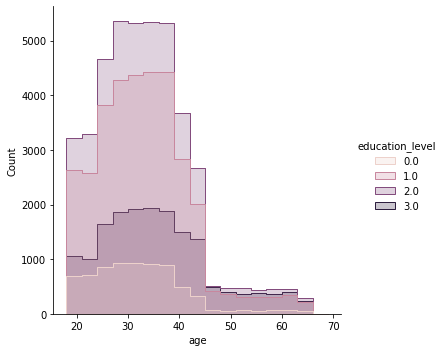

In [10]:
sns.displot(df, x = "age", binwidth=3, hue="education_level",element="step")

In [17]:
df.head()

,ID,income,age,gender,education_level
0,12182,86519.608537,45,1,2.0
1,81213,83085.864980,30,1,2.0
2,1996,82606.214973,22,1,2.0
3,9366,81551.229988,36,1,2.0
4,9733,79593.253224,51,1,1.0


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [13]:
    def gender_to_numeric(x):
        if x=='M': return 1
        if x=='F':   return 0

    df['gender'] = df['gender'].apply(gender_to_numeric)

In [14]:
X = df.drop(["income","ID"], axis=1)
y = df["income"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [18]:
ridge_model.intercept_

19412.112093422726

In [19]:
ridge_model = Ridge().fit(X_train, y_train)

In [20]:
y_pred = ridge_model.predict(X_train)

In [39]:
data = [[30, 0, 2], [30,1,2]]
t  = pd.DataFrame(data, columns=['age', 'gender', 'education_level'])

In [40]:
ridge_model.predict(t)

array([39556.15766683, 39614.60797965])

In [34]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

9441.797062636528

In [41]:
import pickle

In [43]:
pickle.dump(ridge_model, open("ridge_model.sav", "wb"))